# COVID Global ScratchPad 

Do the same using Global data from John Hopkins University

https://github.com/CSSEGISandData/COVID-19   

https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv


In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from io import StringIO
import pandas as pd
import requests

dfc_graw = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
dfd_graw = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')

dfc_g = dfc_graw.drop(columns=['Lat','Long','Province/State']).groupby(['Country/Region']).sum().sort_values(dfc_graw.columns[-1], ascending=False)
dfc_g = dfc_g.transpose()  
dfc_g.index = pd.to_datetime(dfc_g.index)
display('cases',dfc_g.tail())
display('chg in cases',dfc_g.tail().diff(axis=0))

dfd_g = dfd_graw.drop(columns=['Lat','Long','Province/State']).groupby(['Country/Region']).sum().sort_values(dfd_graw.columns[-1], ascending=False)
dfd_g = dfd_g.transpose().tail(40)  # last 40 days ?
dfd_g.index = pd.to_datetime(dfd_g.index) 
display('deaths',dfd_g.tail())
display('chg in deaths',dfd_g.tail().diff(axis=0))

#display('details of', dfd_g['Sudan'].tail(15), dfc_g['Sudan'].tail(15))


'cases'

Country/Region,US,Spain,Italy,France,Germany,United Kingdom,China,Iran,Turkey,Belgium,...,MS Zaandam,Holy See,Papua New Guinea,Mauritania,Western Sahara,Bhutan,Burundi,Sao Tome and Principe,South Sudan,Yemen
2020-04-13,580619,170099,159516,125394,130072,89570,83213,73303,61049,30589,...,9,8,2,7,6,5,5,4,4,1
2020-04-14,607670,172541,162488,131361,131359,94845,83306,74877,65111,31119,...,9,8,2,7,6,5,5,4,4,1
2020-04-15,636350,177644,165155,134582,134753,99483,83356,76389,69392,33573,...,9,8,2,7,6,5,5,4,4,1
2020-04-16,667801,184948,168941,147091,137698,104145,83403,77995,74193,34809,...,9,8,7,7,6,5,5,4,4,1
2020-04-17,699706,190839,172434,149130,141397,109769,83760,79494,78546,36138,...,9,8,7,7,6,5,5,4,4,1


'chg in cases'

Country/Region,US,Spain,Italy,France,Germany,United Kingdom,China,Iran,Turkey,Belgium,...,MS Zaandam,Holy See,Papua New Guinea,Mauritania,Western Sahara,Bhutan,Burundi,Sao Tome and Principe,South Sudan,Yemen
2020-04-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-04-14,27051.0,2442.0,2972.0,5967.0,1287.0,5275.0,93.0,1574.0,4062.0,530.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-04-15,28680.0,5103.0,2667.0,3221.0,3394.0,4638.0,50.0,1512.0,4281.0,2454.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-04-16,31451.0,7304.0,3786.0,12509.0,2945.0,4662.0,47.0,1606.0,4801.0,1236.0,...,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-04-17,31905.0,5891.0,3493.0,2039.0,3699.0,5624.0,357.0,1499.0,4353.0,1329.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


'deaths'

Country/Region,US,Italy,Spain,France,United Kingdom,Belgium,Iran,China,Germany,Netherlands,...,Equatorial Guinea,Grenada,Rwanda,Saint Vincent and the Grenadines,Saint Lucia,Chad,Saint Kitts and Nevis,Central African Republic,Cambodia,Mongolia
2020-04-13,23528,20465,17756,14986,11347,3903,4585,3345,3194,2833,...,0,0,0,0,0,0,0,0,0,0
2020-04-14,25831,21067,18056,15748,12129,4157,4683,3345,3294,2955,...,0,0,0,0,0,0,0,0,0,0
2020-04-15,28325,21645,18708,17188,12894,4440,4777,3346,3804,3145,...,0,0,0,0,0,0,0,0,0,0
2020-04-16,32916,22170,19315,17941,13759,4857,4869,3346,4052,3327,...,0,0,0,0,0,0,0,0,0,0
2020-04-17,36773,22745,20002,18703,14607,5163,4958,4636,4352,3471,...,0,0,0,0,0,0,0,0,0,0


'chg in deaths'

Country/Region,US,Italy,Spain,France,United Kingdom,Belgium,Iran,China,Germany,Netherlands,...,Equatorial Guinea,Grenada,Rwanda,Saint Vincent and the Grenadines,Saint Lucia,Chad,Saint Kitts and Nevis,Central African Republic,Cambodia,Mongolia
2020-04-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-04-14,2303.0,602.0,300.0,762.0,782.0,254.0,98.0,0.0,100.0,122.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-04-15,2494.0,578.0,652.0,1440.0,765.0,283.0,94.0,1.0,510.0,190.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-04-16,4591.0,525.0,607.0,753.0,865.0,417.0,92.0,0.0,248.0,182.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-04-17,3857.0,575.0,687.0,762.0,848.0,306.0,89.0,1290.0,300.0,144.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [50]:
# plot globals?


# Highest Fatality Rates

compare the deaths / cases and find the top -- over a trend line


Country/Region,US,Spain,Italy,France,Germany,United Kingdom,China,Iran,Turkey,Belgium,...,MS Zaandam,Holy See,Papua New Guinea,Mauritania,Western Sahara,Bhutan,Burundi,Sao Tome and Principe,South Sudan,Yemen
2020-04-13,4.05,10.44,12.83,11.95,2.46,12.67,4.02,6.25,2.12,12.76,...,22.22,0.0,0.0,14.29,0.0,0.0,20.0,0.0,0.0,0.0
2020-04-14,4.25,10.46,12.97,11.99,2.51,12.79,4.02,6.25,2.15,13.36,...,22.22,0.0,0.0,14.29,0.0,0.0,20.0,0.0,0.0,0.0
2020-04-15,4.45,10.53,13.11,12.77,2.82,12.96,4.01,6.25,2.19,13.22,...,22.22,0.0,0.0,14.29,0.0,0.0,20.0,0.0,0.0,0.0
2020-04-16,4.93,10.44,13.12,12.20,2.94,13.21,4.01,6.24,2.21,13.95,...,22.22,0.0,0.0,14.29,0.0,0.0,20.0,0.0,0.0,0.0
2020-04-17,5.26,10.48,13.19,12.54,3.08,13.31,5.53,6.24,2.25,14.29,...,22.22,0.0,0.0,14.29,0.0,0.0,20.0,0.0,0.0,0.0


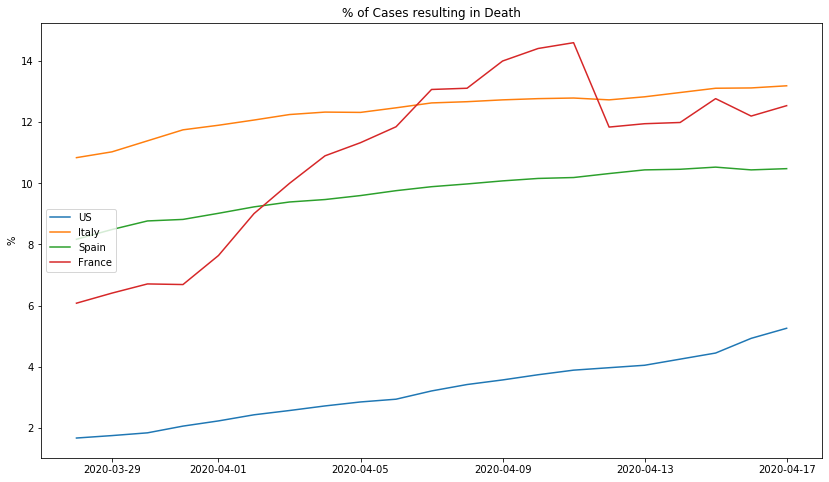

In [51]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

maxdays = 21
maxctys = 15
countries = ['US','Italy','Spain','France']

df_gfat = dfc_g.copy()

for col in df_gfat.columns:
    df_gfat[col] = (dfd_g[col] / df_gfat[col]).mul(100).round(2)
df_gfat = df_gfat.fillna(0)
display(df_gfat.tail())
    
fig,ax1 = plt.subplots(figsize=(14, 8)) 
plt.title('% of Cases resulting in Death')
ax1.set_ylabel('%')  # we already handled the x-label with ax1
lines2 = ax1.plot(df_gfat.tail(maxdays).index, df_gfat.tail(maxdays)[countries])
for c,line in enumerate(lines2):
    line.set_label(countries[c])    
ax1.legend(loc='center left')
plt.show()

plt.show()


,2020-04-17 00:00:00 %
Country/Region,
Algeria,15.05
Belgium,14.29
United Kingdom,13.31
Italy,13.19
France,12.54
Netherlands,11.34
Sweden,10.59
Spain,10.48
Honduras,9.28


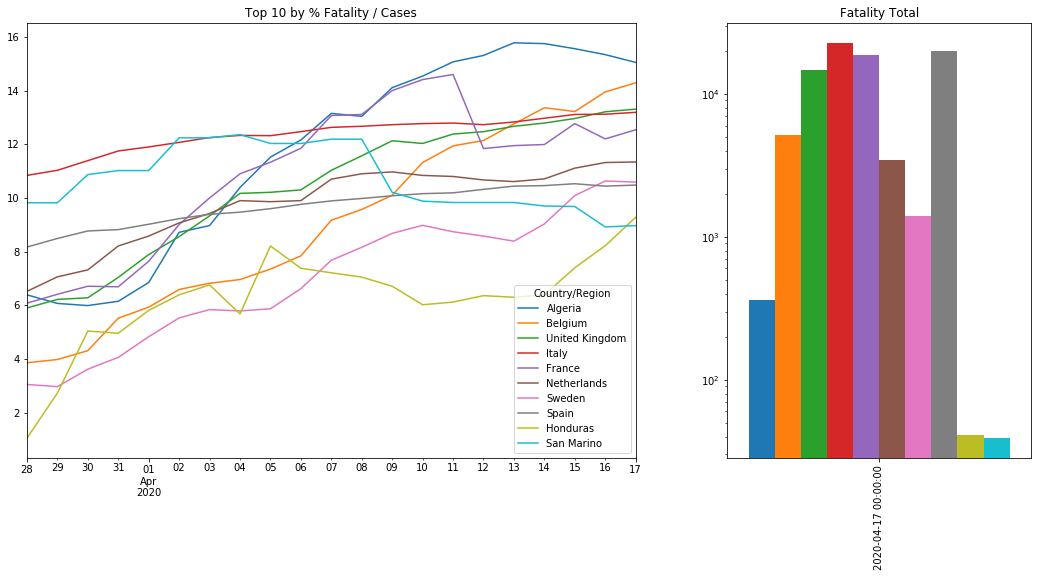

In [52]:
minct = 100
maxdays = 21
maxctys = 10

# sorted only if death count > 100, must transpose first to filter by row
df_gfat2 = dfc_g.copy().transpose()
df_gfat2 = df_gfat2[df_gfat2[df_gfat2.columns[-1]] > minct].transpose()

for col in df_gfat2.columns:
    df_gfat2[col] = (dfd_g[col] / df_gfat2[col]).mul(100).round(2)
df_gfat2 = df_gfat2.fillna(0)
df_gfat2 = df_gfat2.sort_values(df_gfat2.iloc[-1:,:].index.values[0], axis=1, ascending=False)   # column order seems to control legend order
# display(df_gfat2)

dfd_g2 = df_gfat2.copy()  # to hold deaths
for col in dfd_g2.columns:
    dfd_g2[col] = dfd_g[col]
dfd_g2 = dfd_g2.fillna(0)
# display(dfd_g2)

fig, axs = plt.subplots(1,2, sharex=False, figsize=(18,8), gridspec_kw={'width_ratios': [2, 1]})

df_gfat2.iloc[:,0:maxctys].tail(maxdays).plot(ax=axs[0], title='Top 10 by % Fatality / Cases')
dfd_g2.iloc[:,0:maxctys].tail(1).plot(kind='bar',width=3, ax=axs[1], title='Fatality Total', logy=True)
axs[1].get_legend().remove()

display(df_gfat2.iloc[-1:,:].transpose().head(maxctys).rename(columns=lambda x: str(x) + ' %'))


# Lame Stuff Overlay w/ S&P500 from Yahoooo 

In [53]:
#yahoo S&P
sp_df = pd.read_csv('https://query1.finance.yahoo.com/v7/finance/download/%5EGSPC?period1=1581897600&period2=1609372800&interval=1d&events=history')
sp_df = sp_df.set_index('Date')

# create a single table w/ close, states, totalcases
merged_df = pd.merge(left=dfc_g, right=sp_df, left_index=True, right_index=True, how='left')
merged_df = merged_df.fillna(method='backfill')  # fill weekends blanks
merged_df['Global'] = merged_df[merged_df.columns[0:50]].sum(axis=1)

merged_df[['Close','Open','High','Low','US','Iran','Italy','Spain','China','Japan','Global']].tail()

,Close,Open,High,Low,US,Iran,Italy,Spain,China,Japan,Global
2020-04-13,2761.629883,2782.459961,2782.459961,2721.169922,580619,73303,159516,170099,83213,7370,1847813
2020-04-14,2846.060059,2805.100098,2851.850098,2805.100098,607670,74877,162488,172541,83306,7645,1916245
2020-04-15,2783.360107,2795.639893,2801.879883,2761.540039,636350,76389,165155,177644,83356,8100,1993291
2020-04-16,2799.550049,2799.340088,2806.510010,2764.320068,667801,77995,168941,184948,83403,8626,2086645
2020-04-17,2874.560059,2842.429932,2879.219971,2830.879883,699706,79494,172434,190839,83760,9787,2170951


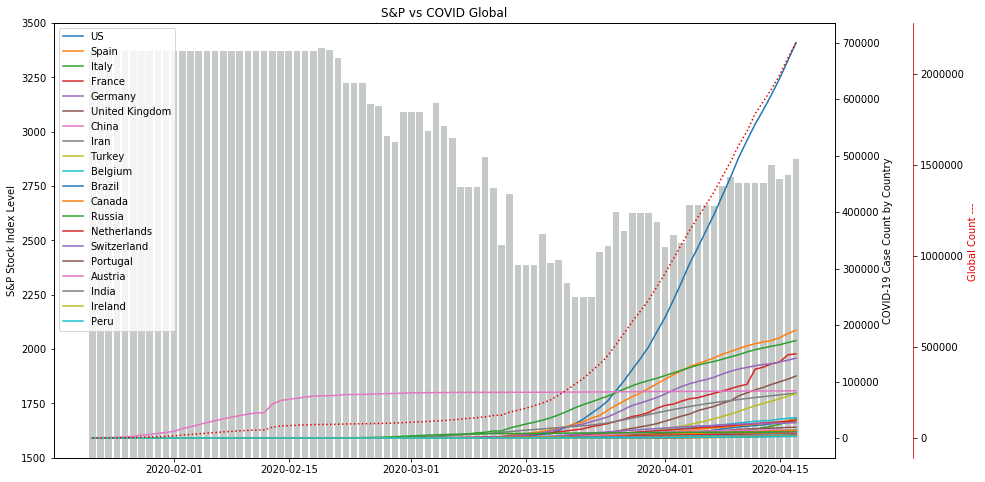

In [54]:
fig,ax1 = plt.subplots(figsize=(14, 8)) 
plt.title('S&P vs COVID Global')

ax1.set_ylabel('S&P Stock Index Level')  # we already handled the x-label with ax1
ax1.set(ylim=[1500, 3500]) 
ax1.bar(merged_df.index, merged_df['Close'], color='xkcd:silver')

ax2 = ax1.twinx()
ax2.set_ylabel('COVID-19 Case Count by Country')  # we already handled the x-label with ax1
lines = ax2.plot(merged_df.index, merged_df[merged_df.columns[0:50]])
for c,line in enumerate(lines[0:20]):
    line.set_label(merged_df.columns[c])
ax2.legend(loc='upper left')

ax3 = ax1.twinx()
ax3.spines["right"].set_position(("axes", 1.1))
ax3.spines["right"].set_color('xkcd:red')
ax3.set_ylabel('Global Count --- ', color='xkcd:red')  
ax3.plot(merged_df.index, merged_df['Global'], color='xkcd:red', linestyle=':')
plt.show()


# More Overlaps (Cases - Deaths) - WIP

2020-01-22     555
2020-01-23     654
2020-01-24     941
2020-01-25    1434
2020-01-26    2118
dtype: int64

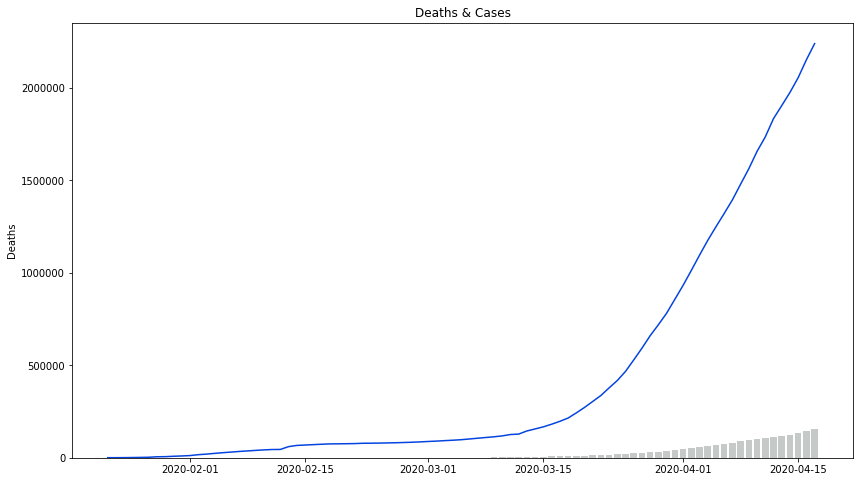

In [55]:
# more overlays -- lets try -- deaths bar, cases line1
dfd_gt = dfd_g.transpose() 
dfc_gt = dfc_g.transpose()

#plotting overlays fun 
fig,ax1 = plt.subplots(figsize=(14, 8)) 
plt.title('Deaths & Cases')

dfc_gsum = dfc_g.sum(axis=1)
dfd_gsum = dfd_g.sum(axis=1)
display(dfc_gsum.head())

ax1.set_ylabel('Deaths')  # we already handled the x-label with ax1
ax1.bar(dfd_gsum.index, dfd_gsum, color='xkcd:silver')
ax1.plot(dfc_gsum.index, dfc_gsum, color='xkcd:blue')

plt.show()


## Top N-Countries by total cases..


In [56]:
maxdays = 10
maxctys = 15

dfd_g2 = dfd_g.transpose()
dfc_g2 = dfc_g.transpose()
display('top countries', dfc_g2.sort_values(by=[dfc_g2.columns[-1]], ascending=False).head(maxctys).iloc[:,-maxdays:])
display('top countries d', dfd_g2.sort_values(by=[dfd_g2.columns[-1]], ascending=False).head(3).iloc[:,-maxdays:])

'top countries'

,2020-04-08,2020-04-09,2020-04-10,2020-04-11,2020-04-12,2020-04-13,2020-04-14,2020-04-15,2020-04-16,2020-04-17
Country/Region,,,,,,,,,,
US,429052,461437,496535,526396,555313,580619,607670,636350,667801,699706
Spain,148220,153222,158273,163027,166831,170099,172541,177644,184948,190839
Italy,139422,143626,147577,152271,156363,159516,162488,165155,168941,172434
France,83057,87366,91738,94863,121712,125394,131361,134582,147091,149130
Germany,113296,118181,122171,124908,127854,130072,131359,134753,137698,141397
United Kingdom,61474,65872,74605,79874,85206,89570,94845,99483,104145,109769
China,82809,82883,82941,83014,83134,83213,83306,83356,83403,83760
Iran,64586,66220,68192,70029,71686,73303,74877,76389,77995,79494
Turkey,38226,42282,47029,52167,56956,61049,65111,69392,74193,78546


'top countries d'

,2020-04-08,2020-04-09,2020-04-10,2020-04-11,2020-04-12,2020-04-13,2020-04-14,2020-04-15,2020-04-16,2020-04-17
Country/Region,,,,,,,,,,
US,14695,16478,18586,20462,22019,23528,25831,28325,32916,36773
Italy,17669,18279,18849,19468,19899,20465,21067,21645,22170,22745
Spain,14792,15447,16081,16606,17209,17756,18056,18708,19315,20002


## Random analysis of various countries

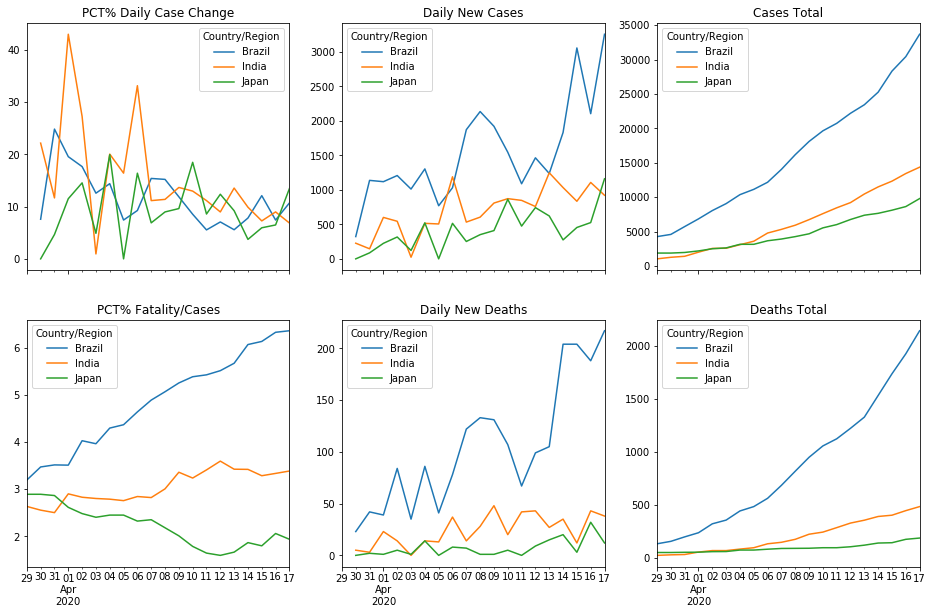

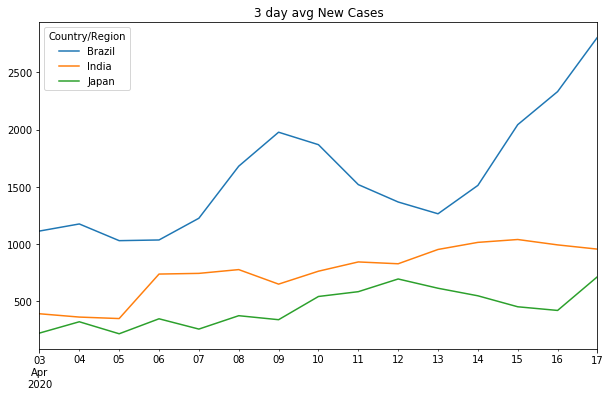

In [73]:
# ad hoc overlays
countries = ['Japan','Singapore','Thailand','Vietnam','India','Korea, South','Pakistan']
countries = ['Japan', 'India','Brazil']
maxdays = 20

fig, axs = plt.subplots(2,3, figsize=(16, 10), sharex=True)
dfc_g3 = dfc_g2.transpose().tail(maxdays).transpose().sort_index()
dfd_g3 = dfd_g2.transpose().tail(maxdays).transpose().sort_index()

pctline = dfc_g3[dfc_g3.index.isin(countries)].pct_change(axis=1).transpose().mul(100).plot(ax=axs[0,0], title='PCT% Daily Case Change')
chgline = dfc_g3[dfc_g3.index.isin(countries)].diff(axis=1).transpose().plot(ax=axs[0,1], title='Daily New Cases')
actline = dfc_g3[dfc_g3.index.isin(countries)].tail(maxdays).transpose().plot(ax=axs[0,2], title='Cases Total')

#i'd like to get the colors to be the same... 
pctline = (dfd_g3[dfd_g3.index.isin(countries)]/dfc_g3[dfc_g3.index.isin(countries)]).transpose().mul(100).plot(ax=axs[1,0], title='PCT% Fatality/Cases')
chgline = dfd_g3[dfd_g3.index.isin(countries)].diff(axis=1).transpose().plot(ax=axs[1,1], title='Daily New Deaths')
actline = dfd_g3[dfd_g3.index.isin(countries)].transpose().plot(ax=axs[1,2], title='Deaths Total')
plt.show()


roll = dfc_g3[dfc_g3.index.isin(countries)].diff(axis=1).transpose().rolling(3, axis=0).mean().round(0)
roll.tail(maxdays-5).plot(figsize=(10,6), title='3 day avg New Cases')


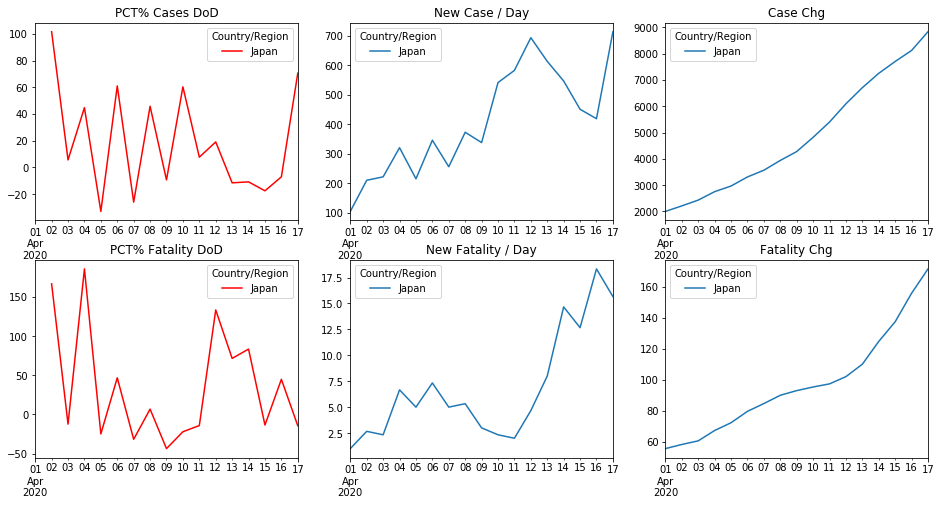

Country/Region,Japan
2020-04-13,-0.115810
2020-04-14,-0.108696
2020-04-15,-0.175610
2020-04-16,-0.071006
2020-04-17,0.705414


Country/Region,Japan
2020-04-13,0.714286
2020-04-14,0.833333
2020-04-15,-0.136364
2020-04-16,0.447368
2020-04-17,-0.145455


In [58]:
# rolling 3 day to smooth out 
countries = ['Japan']
maxdays3 = maxdays-3  # trim the rolling/diff 3 days

fig, axs = plt.subplots(2,3, figsize=(16, 8), sharex=False, )

dfd_g2r = dfd_g3.rolling(window=3, axis=1).mean().sort_index()
dfc_g2r = dfc_g3.rolling(window=3, axis=1).mean().sort_index()

colors=['Red','Orange','Blue','Green']
pctline = dfc_g2r[dfc_g2r.index.isin(countries)].diff(axis=1).pct_change(axis=1).transpose().tail(maxdays3).mul(100).plot(ax=axs[0,0], title='PCT% Cases DoD', color=colors)
chgline = dfc_g2r[dfc_g2r.index.isin(countries)].diff(axis=1).transpose().tail(maxdays3).plot(ax=axs[0,1], title='New Case / Day')
actline = dfc_g2r[dfc_g2r.index.isin(countries)].transpose().tail(maxdays3).plot(ax=axs[0,2], title='Case Chg')

pctline = dfd_g2r[dfd_g2r.index.isin(countries)].diff(axis=1).pct_change(axis=1).transpose().tail(maxdays3).mul(100).plot(ax=axs[1,0], title='PCT% Fatality DoD' ,color=colors)
chgline = dfd_g2r[dfd_g2r.index.isin(countries)].diff(axis=1).transpose().tail(maxdays3).plot(ax=axs[1,1], title='New Fatality / Day')
actline = dfd_g2r[dfd_g2r.index.isin(countries)].transpose().tail(maxdays3).plot(ax=axs[1,2], title='Fatality Chg')
plt.show()

display(dfc_g2r[dfc_g2r.index.isin(countries)].diff(axis=1).pct_change(axis=1).transpose().tail())
display(dfd_g2r[dfd_g2r.index.isin(countries)].diff(axis=1).pct_change(axis=1).transpose().tail())


# Rival Countries

Country/Region,India,Poland,Sweden
2020-04-13,10453,6934,10948
2020-04-14,11487,7202,11445
2020-04-15,12322,7582,11927
2020-04-16,13430,7918,12540
2020-04-17,14352,8379,13216


Country/Region,India,Poland,Sweden
2020-04-13,358,245,919
2020-04-14,393,263,1033
2020-04-15,405,286,1203
2020-04-16,448,314,1333
2020-04-17,486,332,1400


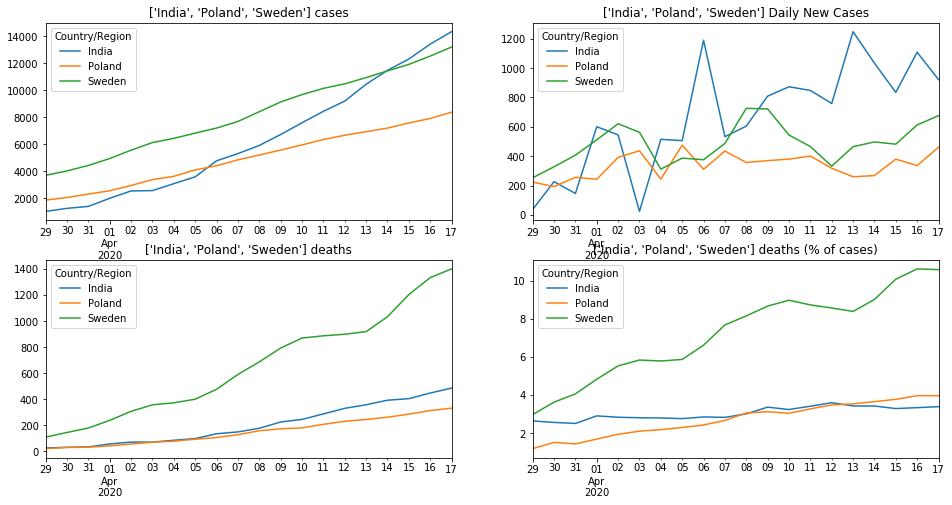

In [59]:
maxdays = 20
countries = ['India','Poland','Sweden']

fig, axs = plt.subplots(2,2, figsize=(16, 8), sharex=False )

dfc_g[countries].tail(maxdays).plot(title=str(countries)+' cases', ax=axs[0,0])
dfc_g[countries].diff().tail(maxdays).plot(title=str(countries)+' Daily New Cases', ax=axs[0,1])

dfd_g[countries].tail(maxdays).plot(title=str(countries)+' deaths', ax=axs[1,0])
(dfd_g[countries] / dfc_g[countries]).mul(100).tail(maxdays).plot(title=str(countries)+' deaths (% of cases)', ax=axs[1,1])

display(dfc_g[countries].tail(5))
display(dfd_g[countries].tail(5))


Country/Region,Belgium,Netherlands,Luxembourg
2020-04-13,30589,26710,3292
2020-04-14,31119,27580,3307
2020-04-15,33573,28316,3373
2020-04-16,34809,29383,3444
2020-04-17,36138,30619,3480


Country/Region,Belgium,Netherlands,Luxembourg
2020-04-13,3903,2833,69
2020-04-14,4157,2955,67
2020-04-15,4440,3145,69
2020-04-16,4857,3327,69
2020-04-17,5163,3471,72


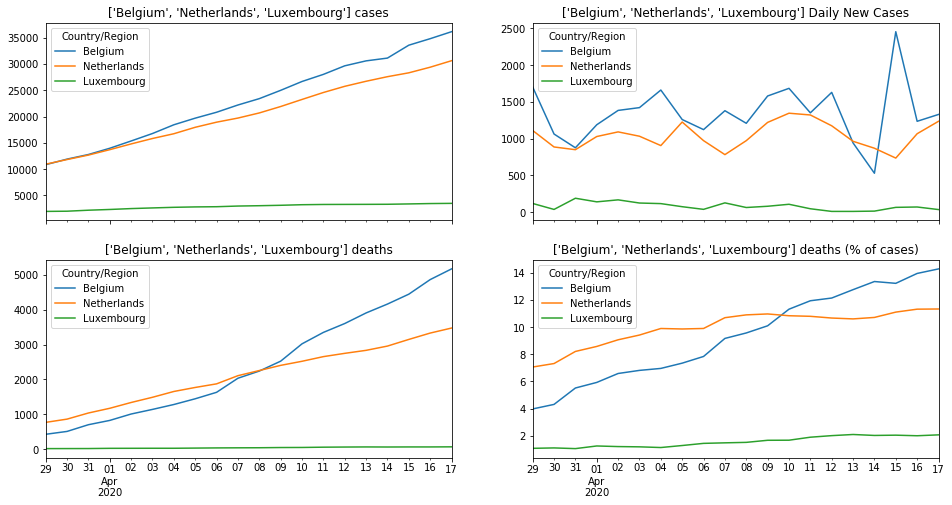

In [60]:
# benelux
maxdays = 20
countries = ['Belgium','Netherlands','Luxembourg']


fig, axs = plt.subplots(2,2, figsize=(16, 8), sharex=True, )

dfc_g[countries].tail(maxdays).plot(title=str(countries)+' cases', ax=axs[0,0])
dfc_g[countries].diff().tail(maxdays).plot(title=str(countries)+' Daily New Cases', ax=axs[0,1])

dfd_g[countries].tail(maxdays).plot(title=str(countries)+' deaths', ax=axs[1,0])
(dfd_g[countries] / dfc_g[countries]).mul(100).tail(maxdays).plot(title=str(countries)+' deaths (% of cases)', ax=axs[1,1])

display(dfc_g[countries].tail(5))
display(dfd_g[countries].tail(5))

Country/Region,Finland,Norway,Sweden
2020-04-13,3064,6603,10948
2020-04-14,3161,6623,11445
2020-04-15,3237,6740,11927
2020-04-16,3369,6896,12540
2020-04-17,3489,6937,13216


Country/Region,Finland,Norway,Sweden
2020-04-13,59,134,919
2020-04-14,64,139,1033
2020-04-15,72,150,1203
2020-04-16,75,152,1333
2020-04-17,82,161,1400


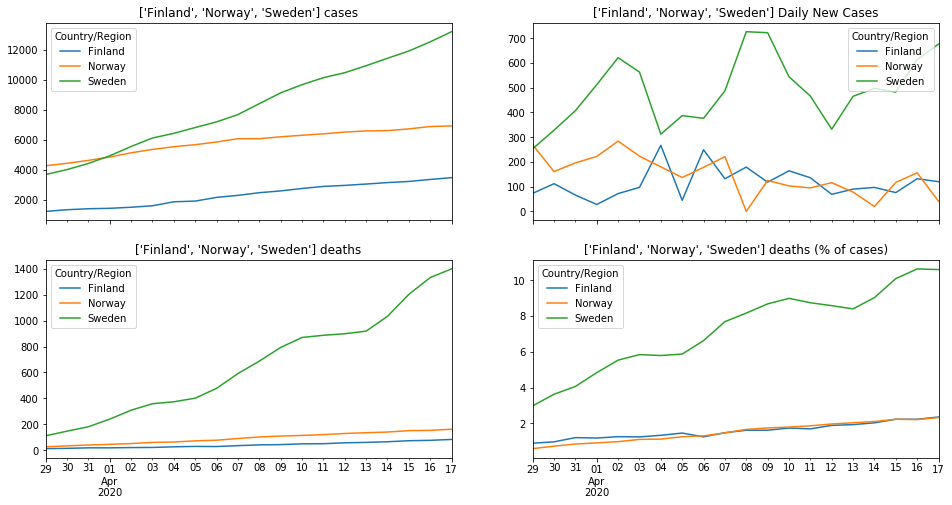

In [61]:
# nordics
maxdays = 20
countries = ['Finland','Norway','Sweden']


fig, axs = plt.subplots(2,2, figsize=(16, 8), sharex=True, )

dfc_g[countries].tail(maxdays).plot(title=str(countries)+' cases', ax=axs[0,0])
dfc_g[countries].diff().tail(maxdays).plot(title=str(countries)+' Daily New Cases', ax=axs[0,1])

dfd_g[countries].tail(maxdays).plot(title=str(countries)+' deaths', ax=axs[1,0])
(dfd_g[countries] / dfc_g[countries]).mul(100).tail(maxdays).plot(title=str(countries)+' deaths (% of cases)', ax=axs[1,1])

display(dfc_g[countries].tail(5))
display(dfd_g[countries].tail(5))


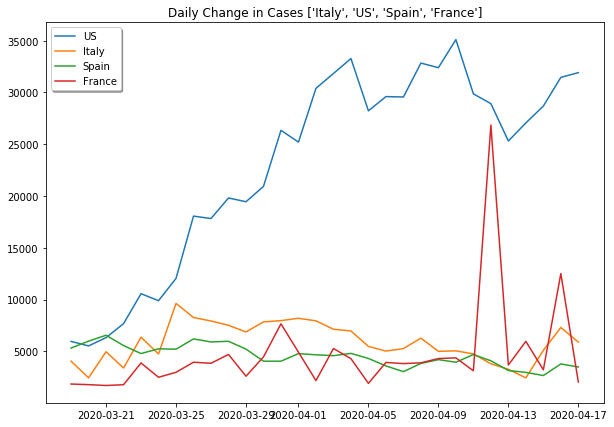

Country/Region,US,Spain,Italy,France
2020-04-13,25306.0,3268.0,3153.0,3682.0
2020-04-14,27051.0,2442.0,2972.0,5967.0
2020-04-15,28680.0,5103.0,2667.0,3221.0
2020-04-16,31451.0,7304.0,3786.0,12509.0
2020-04-17,31905.0,5891.0,3493.0,2039.0


In [62]:
# global rate
maxdays = 30
countries = ['Italy','US','Spain','France']
sorthack = ['US','Italy','Spain','France']

dfc_gdiff= dfc_g.transpose().sum().diff()

plt.figure(figsize=(10,7)) 
plt.plot(dfc_g2[dfc_g2.index.isin(countries)].diff(axis=1).transpose().tail(maxdays))
# plt.plot(dfc_gdiff.tail(30))
plt.legend(sorthack, loc='upper left', shadow=True)  # bit of pain to name these manually in order
plt.title('Daily Change in Cases '+str(countries))

plt.show()
display(dfc_g2[dfc_g2.index.isin(countries)].diff(axis=1).transpose().tail(5))


,2020-04-08,2020-04-09,2020-04-10,2020-04-11,2020-04-12,2020-04-13,2020-04-14,2020-04-15,2020-04-16,2020-04-17
Country/Region,,,,,,,,,,
US,397314.0,428904.0,462341.0,494789.0,526081.0,554109.0,581201.0,608213.0,637274.0,667952.0
Spain,142279.0,147795.0,153238.0,158174.0,162710.0,166652.0,169824.0,173428.0,178378.0,184477.0
Italy,135852.0,139545.0,143542.0,147825.0,152070.0,156050.0,159456.0,162386.0,165528.0,168843.0
France,79188.0,83195.0,87387.0,91322.0,102771.0,113990.0,126156.0,130446.0,137678.0,143601.0
Germany,108111.0,113047.0,117883.0,121753.0,124978.0,127611.0,129762.0,132061.0,134603.0,137949.0
United Kingdom,56567.0,61098.0,67317.0,73450.0,79895.0,84883.0,89874.0,94633.0,99491.0,104466.0
China,82731.0,82803.0,82878.0,82946.0,83030.0,83120.0,83218.0,83292.0,83355.0,83506.0
Iran,62558.0,64465.0,66333.0,68147.0,69969.0,71673.0,73289.0,74856.0,76420.0,77959.0
Turkey,34184.0,38206.0,42512.0,47159.0,52051.0,56724.0,61039.0,65184.0,69565.0,74044.0


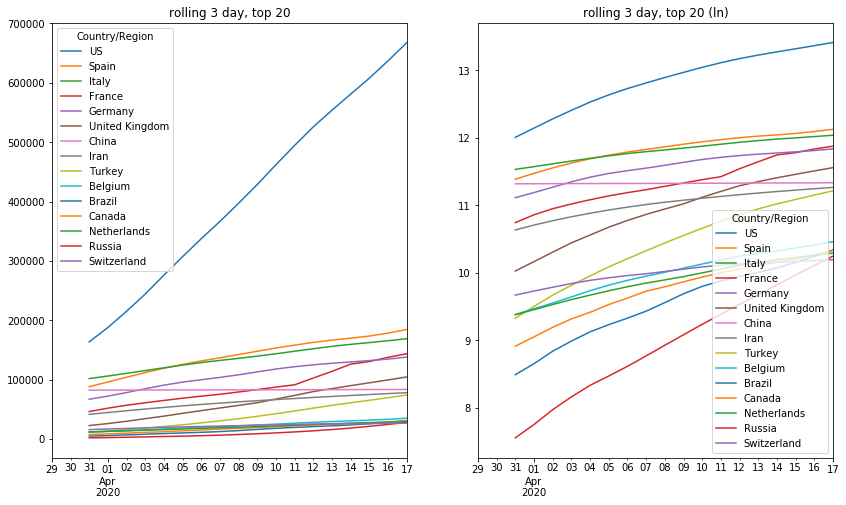

In [63]:
# rolling 3 day average highs
fig, axs = plt.subplots(1,2)

df_roll = dfc_g3.rolling(3,axis=1,center=False).mean().round()
df_roll = df_roll.sort_values(by=[df_roll.columns[-1]], ascending=False).head(15)
display(df_roll.iloc[:,-10:])
df_roll.iloc[:,-28:].transpose().plot(figsize=(14,8),title='rolling 3 day, top 20',ax=axs[0])
df_roll.iloc[:,-28:].transpose().apply(np.log).plot(figsize=(14,8),title='rolling 3 day, top 20 (ln)',ax=axs[1])



# Global Population Comparisons

In [64]:
# GLobal Population 
# https://github.com/datasets/population/blob/master/data/population.csv

df_gpop = pd.read_csv('https://raw.githubusercontent.com/datasets/population/master/data/population.csv')
df_gpop_2016 = df_gpop[df_gpop['Year'] == 2016]
df_gpop_2016 = df_gpop_2016.rename(columns={'Country Name': 'Country/Region'})

display(df_gpop_2016.shape, df_gpop_2016.head(3), dfc_g.transpose().shape, dfc_g.tail(1).transpose().head(3))  #262 countries

df_gmerged = pd.merge(left=dfc_g.tail(1).transpose(), right=df_gpop_2016, on='Country/Region', how='outer')
df_gmerged = df_gmerged.rename(columns={df_gmerged.columns[1]:'Cases', 'Value':'Population'})
df_gmerged['% of pop'] = (df_gmerged['Cases'] / df_gmerged['Population']).mul(100).round(2)

display(df_gmerged.shape, df_gmerged.sort_values(by=['% of pop'], ascending=False).head())


(262, 4)

,Country/Region,Country Code,Year,Value
56,Arab World,ARB,2016,404024433
115,Caribbean small states,CSS,2016,7269386
174,Central Europe and the Baltics,CEB,2016,102994343


(185, 87)

,2020-04-17
Country/Region,
US,699706
Spain,190839
Italy,172434


(289, 6)

,Country/Region,Cases,Country Code,Year,Population,% of pop
100,San Marino,435.0,SMR,2016.0,33504.0,1.30
84,Andorra,696.0,AND,2016.0,77297.0,0.90
47,Luxembourg,3480.0,LUX,2016.0,582014.0,0.60
60,Iceland,1754.0,ISL,2016.0,335439.0,0.52
1,Spain,190839.0,ESP,2016.0,46484062.0,0.41


C:\Users\dougc\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: `item` has been deprecated and will be removed in a future version
  # This is added back by InteractiveShellApp.init_path()
C:\Users\dougc\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: FutureWarning: `item` has been deprecated and will be removed in a future version


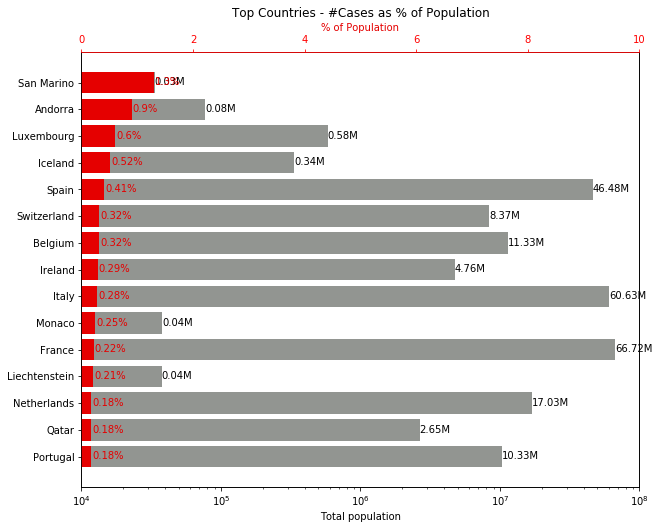

In [65]:
max_ctys = 15
fig,ax1 = plt.subplots(figsize=(10, 8)) 

df_gmerged_h = df_gmerged.sort_values(by=['% of pop'],ascending=False).head(max_ctys)

ax1.set_xscale('log')
ax1.set(xlim=[10**4, 10**8])   # get max min +/- buffer
ax1.set_xlabel('Total population')  
ax1.barh(df_gmerged_h['Country/Region'], df_gmerged_h['Population'], color='xkcd:grey')
for n,i in enumerate(ax1.patches):
    ax1.text(i.get_width()+.02, i.get_y()+.5,str(df_gmerged_h['Population'].div(1000000).round(2).iloc[n:n+1].item()) + 'M', color='xkcd:black')

    
ax2 = ax1.twiny()
ax2.set_xscale('linear')
ax2.set(xlim=[0, 10])   # get max min +/- buffer
ax2.set_xlabel('% of Population', color='xkcd:red')  
ax2.spines['top'].set_color('red')
ax2.tick_params(axis='x', colors='red')
ax2.barh(df_gmerged_h['Country/Region'], df_gmerged_h['% of pop'], color='xkcd:red')
for n,i in enumerate(ax2.patches):
    ax2.text(i.get_width()+.02, i.get_y()+.5,str(df_gmerged_h['% of pop'].iloc[n:n+1].item()) + '%', color='xkcd:red')
plt.title('Top Countries - #Cases as % of Population')
plt.gca().invert_yaxis()
plt.show()

# Emerging Markets (>100 cases)

In [66]:
# EMERGING markets - > 100 but not biggest
minct = 100

dfc_g3 = dfc_g2.diff(axis=1)
dfc_g3.columns = pd.to_datetime(dfc_g3.columns)
dfc_g3p = dfc_g2.pct_change(axis=1).mul(100).round()
dfc_g3p.columns = pd.to_datetime(dfc_g3p.columns)

dfc_merge = pd.merge(left=dfc_g2, right=dfc_g3p, left_index=True, right_index=True, suffixes=('',' %chg'))
# weird it goes to timestamp now
dfc_merge = dfc_merge.reindex(sorted(dfc_merge.columns), axis=1)
dfc_merge = dfc_merge[dfc_merge[dfc_merge.columns[-2]] > minct]

display('top 20 growth countries, > 100 cases', 
        dfc_merge.sort_values(by=dfc_merge.columns[-1], ascending=False).head(20).iloc[:,-6:].rename(columns=lambda x: x.replace('00:00:00','').replace('2020-','')))


'top 20 growth countries, > 100 cases'

,04-15,04-15 %chg,04-16,04-16 %chg,04-17,04-17 %chg
Country/Region,,,,,,
Tanzania,88,66.0,94,7.0,147,56.0
Somalia,80,33.0,80,0.0,116,45.0
Gabon,80,40.0,80,0.0,108,35.0
Djibouti,435,20.0,591,36.0,732,24.0
Congo (Brazzaville),117,95.0,117,0.0,143,22.0
Bangladesh,1231,22.0,1572,28.0,1838,17.0
Russia,24490,16.0,27938,14.0,32008,15.0
Qatar,3711,8.0,4103,11.0,4663,14.0
Singapore,3699,14.0,4427,20.0,5050,14.0


# Global Heatmap (Using Shape Files) - WIP


I wanted to map by country, but need to find a country equivalent of a FIPS code (or match by country name to a map file).

Another way is to use GPS (Long/Lat) geocordinates and a Map (shape file).   However my global data is sometimes clumped into one lat/long for some countrues like Japan and US, and detailed locations in places like France.

,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,last
107,France,3.9339,-53.1258,0,0,0,0,0,0,0,...,83,83,83,86,86,86,86,86,96,96
108,France,-17.6797,149.4068,0,0,0,0,0,0,0,...,51,51,51,53,55,55,55,55,55,55
109,France,16.2500,-61.5833,0,0,0,0,0,0,0,...,141,143,143,143,143,145,145,145,145,145
110,France,-12.8275,45.1662,0,0,0,0,0,0,0,...,184,191,196,196,207,217,217,233,245,245
111,France,-20.9043,165.6180,0,0,0,0,0,0,0,...,18,18,18,18,18,18,18,18,18,18
112,France,-21.1351,55.2471,0,0,0,0,0,0,0,...,362,382,388,389,391,391,391,394,402,402
113,France,17.9000,-62.8333,0,0,0,0,0,0,0,...,6,6,6,6,6,6,6,6,6,6
114,France,18.0708,-63.0501,0,0,0,0,0,0,0,...,32,32,32,32,32,32,35,35,35,35
115,France,14.6415,-61.0242,0,0,0,0,0,0,0,...,154,155,155,155,157,157,158,158,158,158
116,France,46.2276,2.2137,0,0,2,3,3,3,4,...,86334,90676,93790,120633,124298,130253,133470,145960,147969,147969


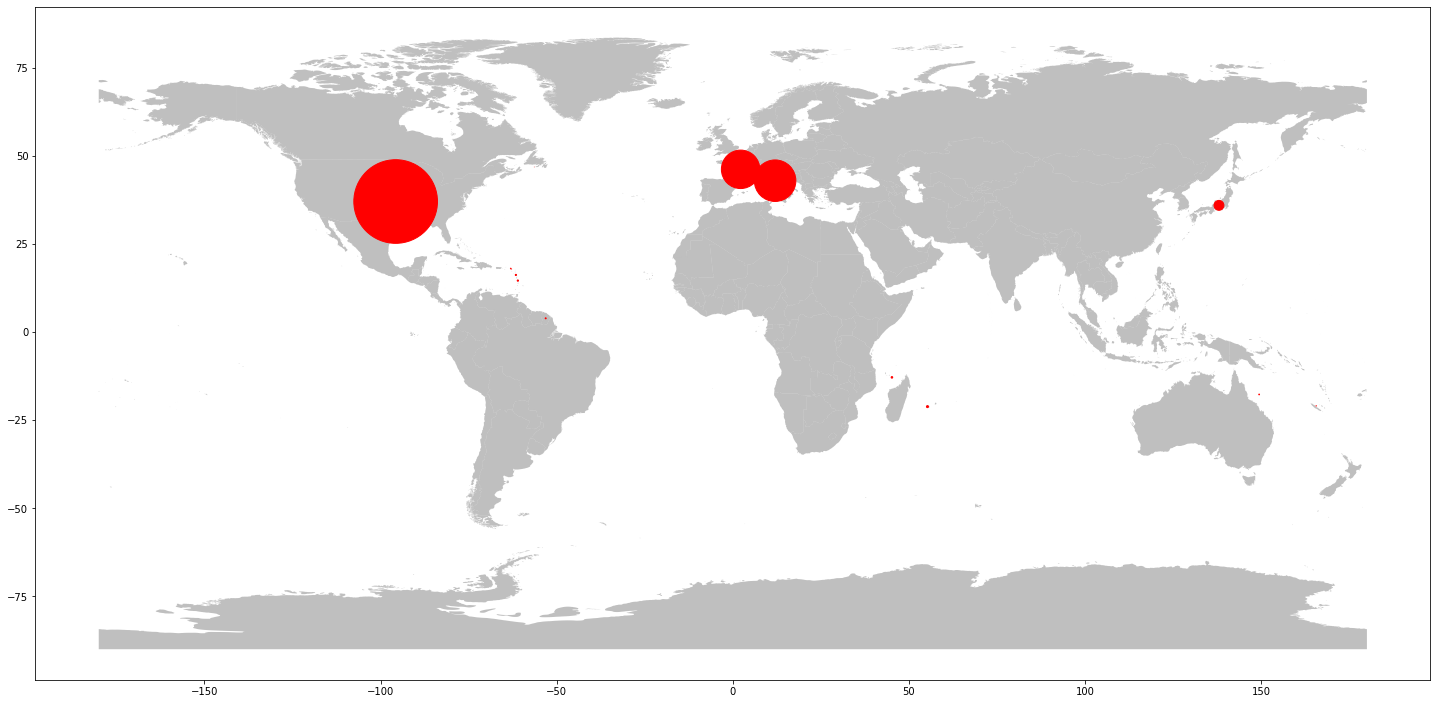

In [67]:
# country shape file https://hub.arcgis.com/datasets/UIA::uia-latitude-longitude-graticules-and-world-countries-boundaries?geometry=-144.961%2C-72.317%2C-179.414%2C79.981&layer=1
import geopandas as gpd
from shapely.geometry import Point, Polygon
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

gmap = gpd.read_file('maps/Countries_WGS84.shp')

# remove hi/ak for now
dfc_geo = dfc_graw.drop(columns=['Province/State'])
dfc_geo['last'] = dfc_geo[dfc_geo.columns[-1]]
dfc_geo = dfc_geo[dfc_geo['Country/Region'].isin(['US','Italy','Japan','France'])]
display(dfc_geo)


geometry = [Point(xy) for xy in zip(dfc_geo["Long"],dfc_geo["Lat"]) ] 
geo_df = gpd.GeoDataFrame(dfc_geo,crs={"init": "EPSG:7030"},geometry=geometry)
geo_df = geo_df[['Country/Region','last','geometry']]

fig, ax = plt.subplots(figsize=(25,25))
gmap.plot(ax=ax, alpha=0.5, color='grey')

#geo_df.plot(ax=ax, markersize=20, cmap='Reds', label='cases')
geo_df.plot(ax=ax, markersize=dfc_geo['last'].div(100), color='red', label='cases')   # size on last
